In [5]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from PyEMD import EMD, EEMD
#from src.features.EMD import get_EMD_features
#from src.features.no_decomposition import get_no_decomposition_features
import numpy as np

In [6]:
with open('data/Case_2_a_only_basic_DQ', 'rb') as f:
        ((data1_1_df, data1_2_df, data1_3_df),(mean1_df,std1_df)) = pickle.load(f)

data1_df = pd.concat([data1_1_df,data1_2_df,data1_3_df],axis=0)

data1_df = data1_df * std1_df + mean1_df

In [7]:
data1_df.head()

,ASMATN1_T,ASMDEP1_T,ASMDEP2_T,ASMDEP3_T,ASMDOFF_T,ASMECD1_T,ASMECD2_T,ASMMALM1_T,ASMPAM1_T,ASMPAM2_T,...,RSPD,RT_DEPTH_RETURNS_T,SPPAVG,TMOAVG,TQABAV,TRPT,VS__CTR___ACCURATE,VS__CTR___FINAL_ACCURATELY,VS,WOBAVG
TIME,,,,,,,,,,,,,,,,,,,,,
2020-03-22 01:00:01+02:00,0.06,171.74,471.65,129.47,181.52,1.140075,1.1521,0.88,13.51,53.15,...,0.0,151.15,-0.06,8.5116,2.220446e-16,0.0,16.6205,748.4858,-9.6541,0.0
2020-03-22 01:00:02+02:00,0.06,171.74,471.65,129.47,181.52,1.140075,1.1521,0.88,13.51,53.15,...,0.0,151.15,-0.06,8.5116,2.220446e-16,0.0,16.6205,748.4858,-9.6541,0.0
2020-03-22 01:00:03+02:00,0.06,171.74,471.65,129.47,181.52,1.140075,1.1521,0.88,13.51,53.15,...,0.0,151.15,-0.06,8.5116,2.220446e-16,0.0,16.6205,748.4858,-9.6541,0.0
2020-03-22 01:00:04+02:00,0.06,171.74,471.65,129.47,181.52,1.140075,1.1521,0.88,13.51,53.15,...,0.0,151.15,-0.06,8.5116,2.220446e-16,0.0,16.6205,748.4858,-9.6541,0.0
2020-03-22 01:00:05+02:00,0.06,171.74,471.65,129.47,181.52,1.140075,1.1521,0.88,13.51,53.15,...,0.0,151.15,-0.06,8.5116,2.220446e-16,0.0,16.6205,748.4858,-9.6541,0.0


In [8]:
(imin,_) = next((i, el) for i, el in enumerate(data1_df.HDEP.values) if el < 200)
data1_df = data1_df.iloc[imin:]

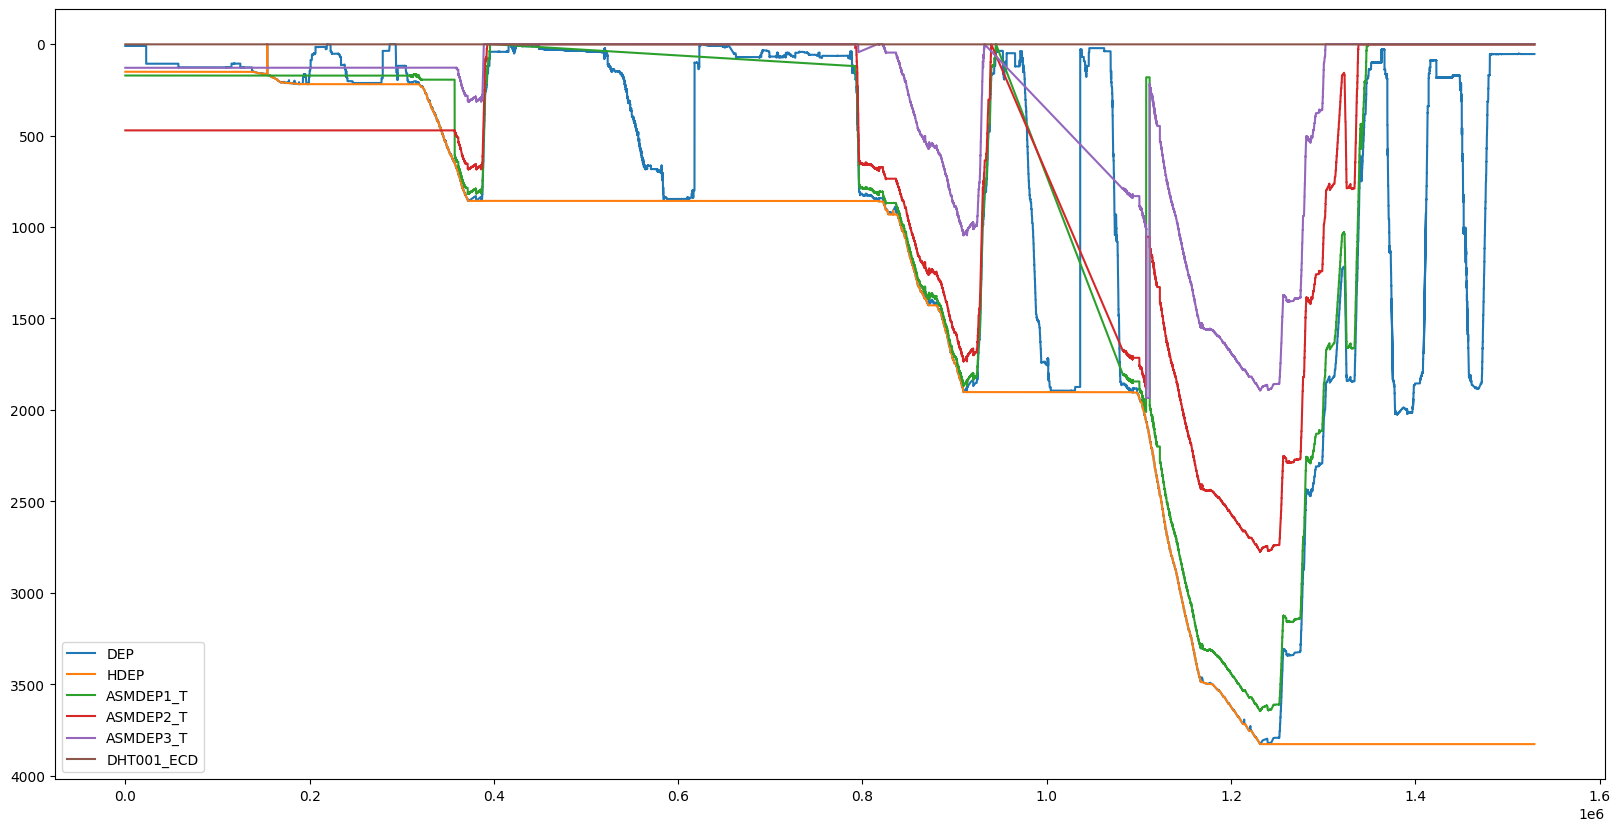

In [9]:
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(data1_df.DEP.values, label='DEP')
plt.plot(data1_df.HDEP.values, label='HDEP')
plt.plot(data1_df.ASMDEP1_T.values, label='ASMDEP1_T')
plt.plot(data1_df.ASMDEP2_T.values, label='ASMDEP2_T')
plt.plot(data1_df.ASMDEP3_T.values, label='ASMDEP3_T')
plt.plot(data1_df["DHT001_ECD"].values, label='DHT001_ECD')

ax.invert_yaxis()

plt.legend()


In [10]:
def chop_timeseries(data, n_samples):
    timeseries = []
    i = 0 
    while(i * n_samples < data.shape[0]):
        if((i + 1 * n_samples) > data.shape[0]):
            timeseries.append(data[i * n_samples:])
        else:
            timeseries.append(data[i * n_samples:(i+1) * n_samples])
        i += 1
    return timeseries

In [11]:
chopped_timeseries = chop_timeseries(data1_df.DEP[:250000].values, 5000)

In [13]:
data1_df.shape

(1529293, 92)

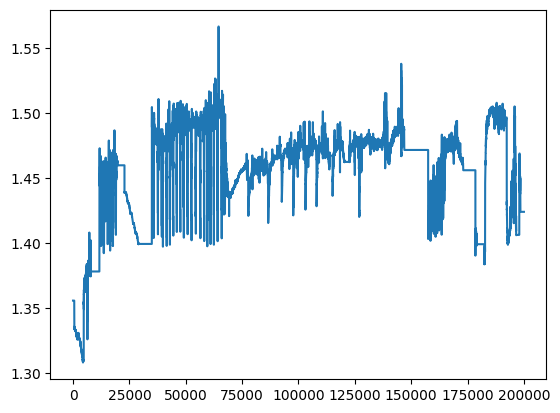

In [33]:
plt.plot(data1_df["DHT001_ECD"].iloc[1100000:1300000].values)

In [32]:
data = data1_df["DHT001_ECD"].iloc[1100000:1300000].values

In [40]:
emd = EMD()
chopped_timeseries = chop_timeseries(data, 10000)
for timeserie in chopped_timeseries:
    IMFs = emd(timeserie, max_imf=10)

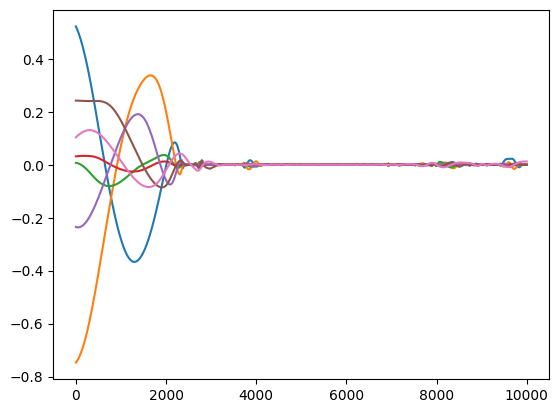

In [38]:
plt.plot(IMFs[0])
plt.plot(IMFs[1])
plt.plot(IMFs[2])
plt.plot(IMFs[3])
plt.plot(IMFs[4])
plt.plot(IMFs[5])
plt.plot(IMFs[6])

In [29]:
IMFs.shape

(13, 10000)

In [42]:
with open('data/Case_2_a_only_basic_DQ', 'rb') as f:
        ((data1_1_df, data1_2_df, data1_3_df),(mean1_df,std1_df)) = pickle.load(f)

data1_df = pd.concat([data1_1_df,data1_2_df,data1_3_df],axis=0)
data1_df = data1_df * std1_df + mean1_df

(imin,_) = next((i, el) for i, el in enumerate(data1_df.HDEP.values) if el < 200)
data = data1_df.iloc[imin:]

print("Data loaded")

chopped_timeseries = chop_timeseries(data["DHT001_ECD"].iloc[1100000:1300000], 25000)

print("Timeseries chopped")
    
df = pd.DataFrame()
for i, timeserie in enumerate(chopped_timeseries):
        
    print(f'Processing (EMD): sample number {i} of {len(chopped_timeseries)}')
        #y_c = utility.denoise_audio(y_c)
        #y_nc = utility.denoise_audio(y_nc)
        
        #y_c, sr_c = downsample(y_c, sr_c)
        #y_nc, sr_nc = downsample(y_nc, sr_nc)

        #t_nc = get_t(y_nc, sr_nc)
        #t_c = get_t(y_c, sr_c)

    emd = EMD()
    IMFs = emd.emd(timeserie, max_imf=10)
        #IMFs_nc = get_n_best_IMFs(y_nc, t_nc, n_imfs, n_sifts, select_imfs)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)